In [1]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

path = "./b_data/"

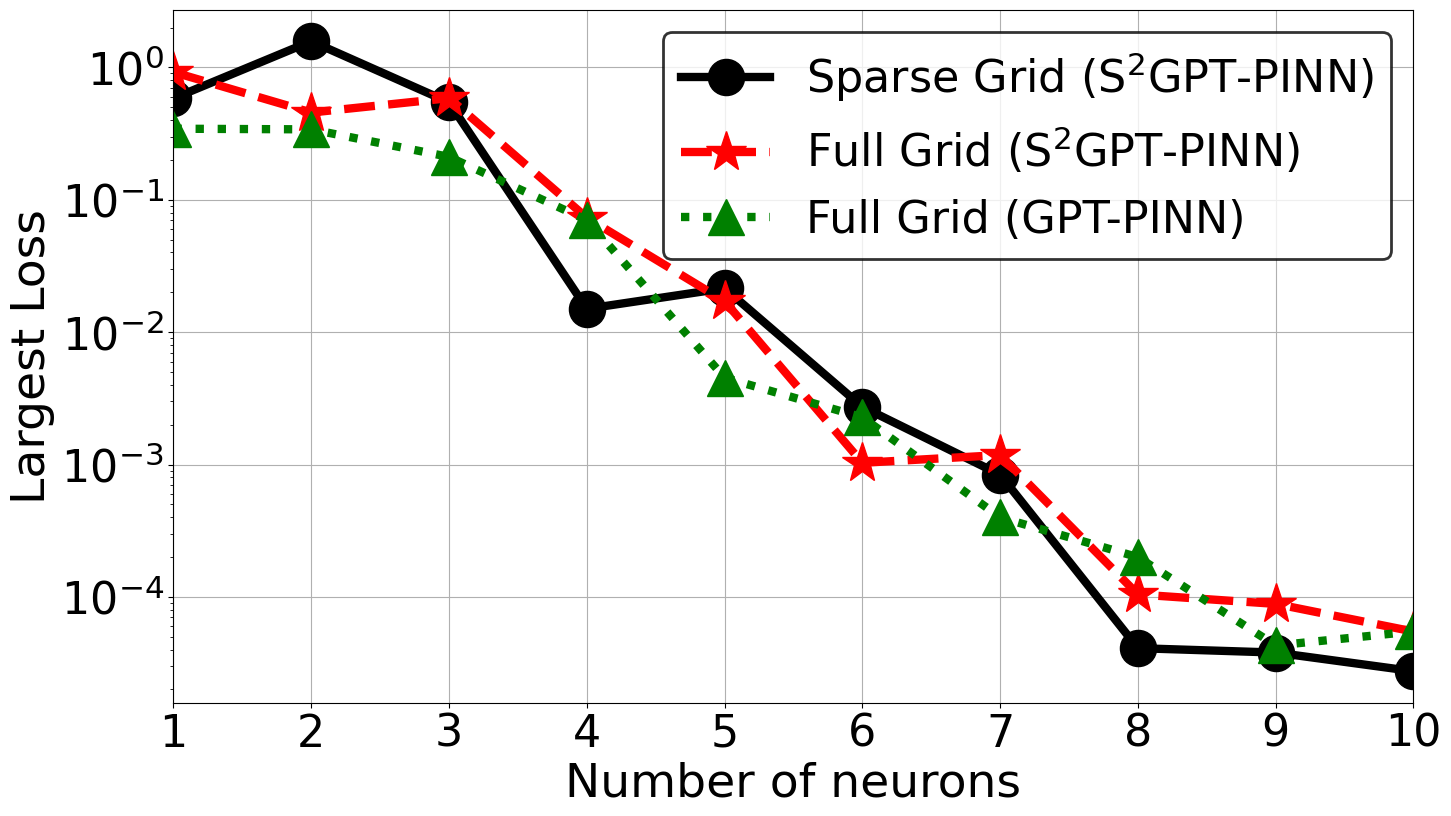

In [38]:
# plot1
loss_list_sgpt_full_grid   = np.loadtxt(path+"loss_list_sgpt_full_grid.dat") # (13,)
loss_list_sgpt_sparse_grid = np.loadtxt(path+"loss_list_sgpt_sparse_grid.dat") # (13,)
loss_list_gpt              = np.loadtxt(path+"loss_list_gpt.dat") # (13,)
fig, ax = plt.subplots(figsize=(16,9))
min_neuron = 0
max_neuron = 10
x = range(min_neuron+1,max_neuron+1)
ax.plot(x, loss_list_sgpt_sparse_grid[min_neuron:max_neuron], color="black", linestyle="solid",  marker="o", ms=26, label="Sparse Grid (S$^2$GPT-PINN)", lw=6)
ax.plot(x, loss_list_sgpt_full_grid[min_neuron:max_neuron],   color="red",   linestyle="dashed", marker="*", ms=30, label="Full Grid (S$^2$GPT-PINN)",   lw=6)
ax.plot(x, loss_list_gpt[min_neuron:max_neuron],              color="green", linestyle="dotted", marker="^", ms=26, label="Full Grid (GPT-PINN)",    lw=6)
ax.set_xticks(ticks=x)
ax.set_xlim(min(x),max(x))
ax.set_yscale("log")
ax.set_xlabel("Number of neurons", fontsize=34)
ax.set_ylabel("Largest Loss", fontsize=34)
legend = ax.legend(frameon=True, fontsize=32)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.grid()
ax.tick_params(axis='both', which='major', labelsize=32)
plt.show()

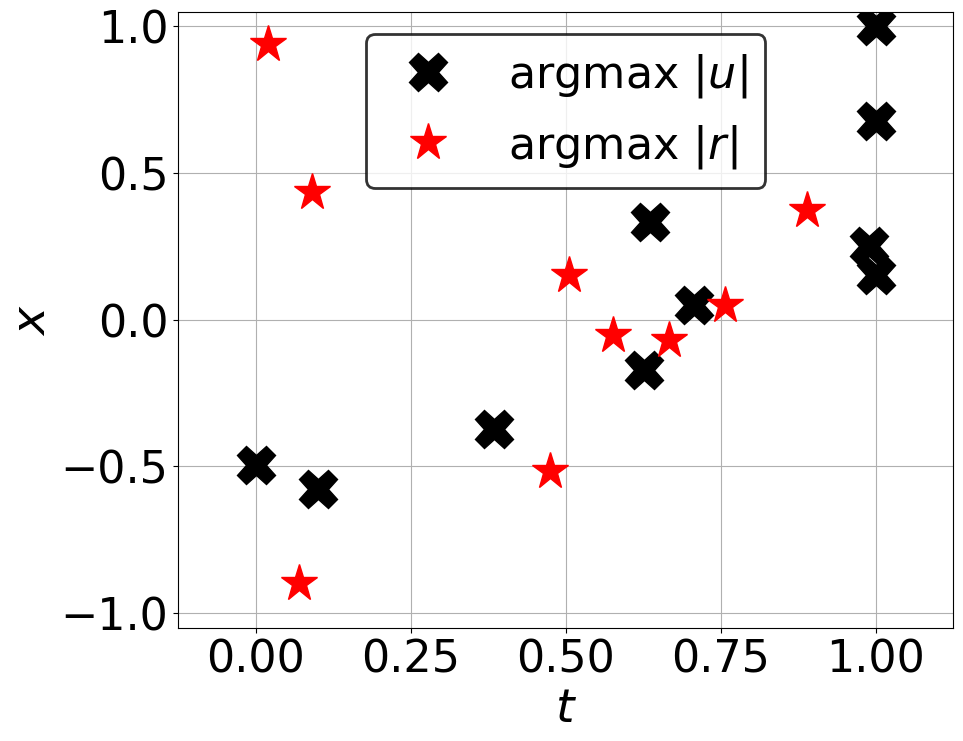

In [6]:
# Sparse training grid (plot3)
xt_resid   = np.loadtxt(path+"xt_resid.dat") # (10000,2)
X_umax_idx = np.loadtxt(path+"X_umax_idx.dat").astype(np.int64) # (13,)
X_rmax_idx = np.loadtxt(path+"X_rmax_idx.dat").astype(np.int64) # (12,)

x_u = xt_resid[X_umax_idx,0]
t_u = xt_resid[X_umax_idx,1]

x_r = xt_resid[X_rmax_idx,0]
t_r = xt_resid[X_rmax_idx,1]

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(t_u, x_u, "X", color="black", label="argmax $|u|$", markersize=28)
ax.plot(t_r, x_r, "*", color="red",   label="argmax $|r|$", markersize=28)
ax.set_xlim(0-0.125,1+0.125)
ax.set_xlabel("$t$", fontsize=34)
ax.set_ylim(-1-0.05,1+0.05)
ax.set_ylabel("$x$", fontsize=34)
legend = ax.legend(frameon=True, fontsize=32)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.tick_params(axis='both', which='major', labelsize=32)
ax.grid()
plt.show()

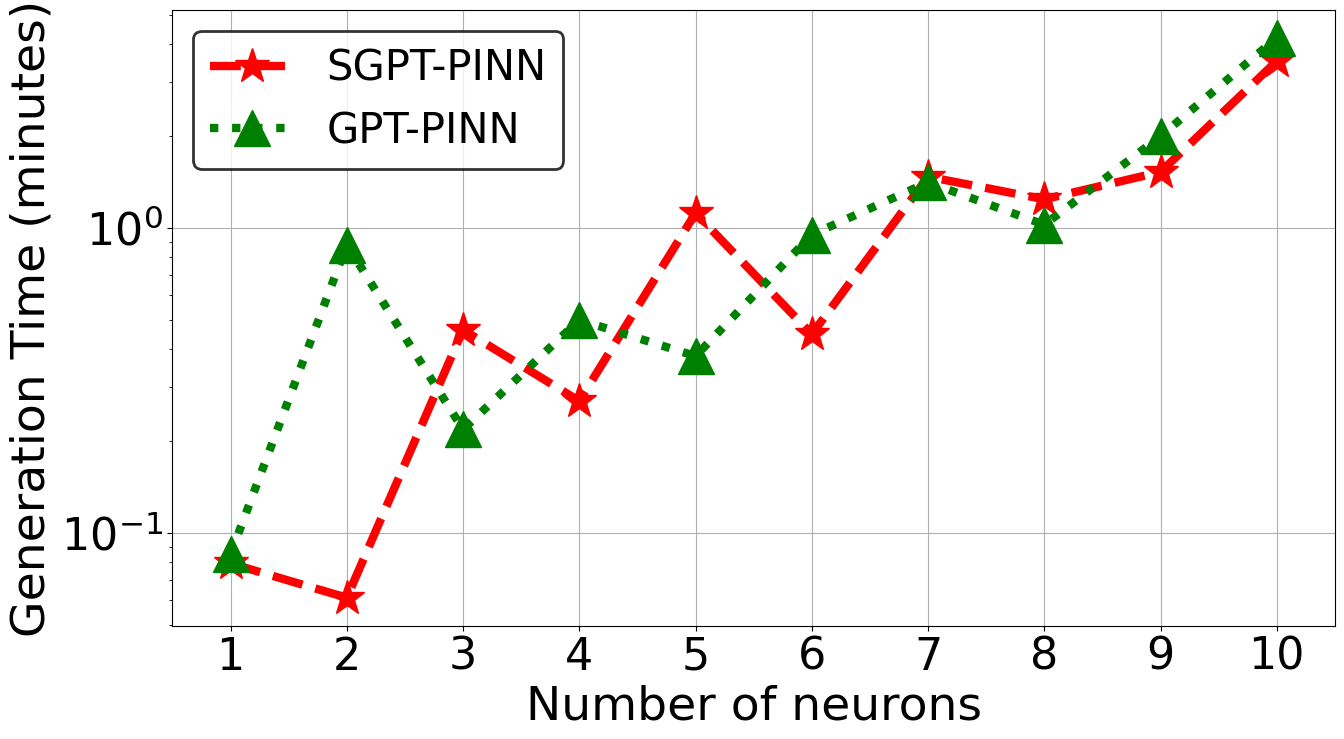

In [7]:
#plot4
params               = np.load("./b_data/params_sgpt.npy", allow_pickle=True).item()
total_epochs         = params['epochs_gpt_train'] * params['parameter size']
generation_time_sgpt = np.loadtxt(path+"sgpt_generation_time.dat") # (13,)
#epoch_cnt_sgpt       = np.loadtxt(path+"epoch_cnt_sgpt.dat") # (13,)
generation_time_gpt  = np.loadtxt(path+"gpt_generation_time.dat") # (13,)
#epoch_cnt_gpt        = np.loadtxt(path+"epoch_cnt_gpt.dat") # (13,)

fig, ax = plt.subplots(figsize=(15,8))
x = range(1,len(generation_time_sgpt)+1)

ax.plot(x, generation_time_sgpt[min_neuron:max_neuron], color="red", linestyle="dashed",  marker="*", label="SGPT-PINN", lw=6, ms=26)
#for i, txt in enumerate(epoch_cnt_sgpt):
 #   ax.annotate(round(txt/total_epochs,3), (x[i], generation_time_sgpt[i]-1), fontsize=22, c="k")
    
ax.plot(x, generation_time_gpt[min_neuron:max_neuron], color="green", linestyle="dotted", marker="^", ms=26, label="GPT-PINN", lw=6)
#for i, txt in enumerate(epoch_cnt_gpt):
 #   ax.annotate(round(txt/total_epochs,3), (x[i], generation_time_gpt[i]-1), fontsize=22, c="k")

ax.set_xticks(ticks=x)
ax.set_yticks(ticks=np.linspace(0,20,9))
ax.set_xlim(0.5,max(x)+0.5)
#ax.set_ylim(-2.5,2.5)
ax.set_xlabel("Number of neurons", fontsize=34)
ax.set_ylabel("Generation Time (minutes)", fontsize=34)
legend = ax.legend(frameon=True, fontsize=30)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.tick_params(axis='both', which='major', labelsize=32)
ax.grid()
plt.yscale('log')
plt.show()

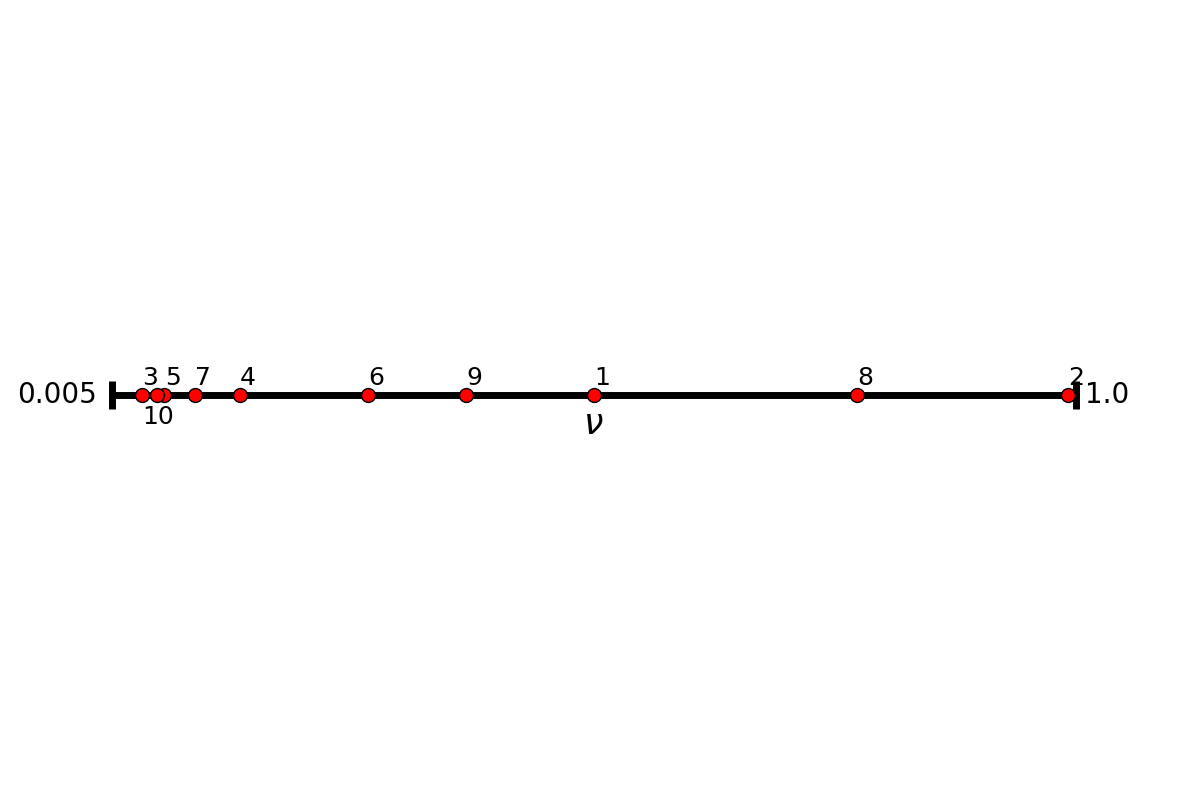

In [2]:
# plot5
neurons_sgpt = np.loadtxt(path+"sgpt_neurons.dat") # (13,3)

# plot6
neurons_gpt = np.loadtxt(path+"gpt_neurons.dat") # (13,3)

fig, ax = plt.subplots(figsize=(15,10))
xmin = 0.005; xmax = 1
y = 1; height = 0.15

ax.hlines(y, xmin, xmax, colors="k", lw=5)
ax.vlines(xmin, y - height/4, y + height/4, colors="k", lw=5)
ax.vlines(xmax, y - height/4, y + height/4, colors="k", lw=5)

xx = neurons_sgpt
yy = [y]*len(neurons_sgpt)

ax.plot(xx, yy, "ko", ms=10, mfc="r")

offsetX=mpl.transforms.ScaledTranslation(.1,  0, fig.dpi_scale_trans)
offsetY=mpl.transforms.ScaledTranslation( 0, .1, fig.dpi_scale_trans)

for i, param in enumerate(neurons_sgpt):
        if i==9:
                ax.text(param-0.025, y, f"{i+1}", ha="left", va="top", transform=ax.transData+offsetX-offsetY, fontsize=18)
        else:
                ax.text(param-0.01, y+0.1, f"{i+1}", ha="left", va="top", transform=ax.transData+offsetX-offsetY, fontsize=18)

ax.text(-0.01, y, "0.005", horizontalalignment="right", 
        verticalalignment="center", fontsize=20)
ax.text(  1.01, y,   "1.0", horizontalalignment="left", 
        verticalalignment="center", fontsize=20)
ax.text((0.005+1.0)/2, y-0.1, r"$\nu$", fontsize=25, 
        horizontalalignment="center")
ax.set_xlim(-0.1,1.1)
ax.set_ylim(0,2)
ax.axis("off")
plt.show()

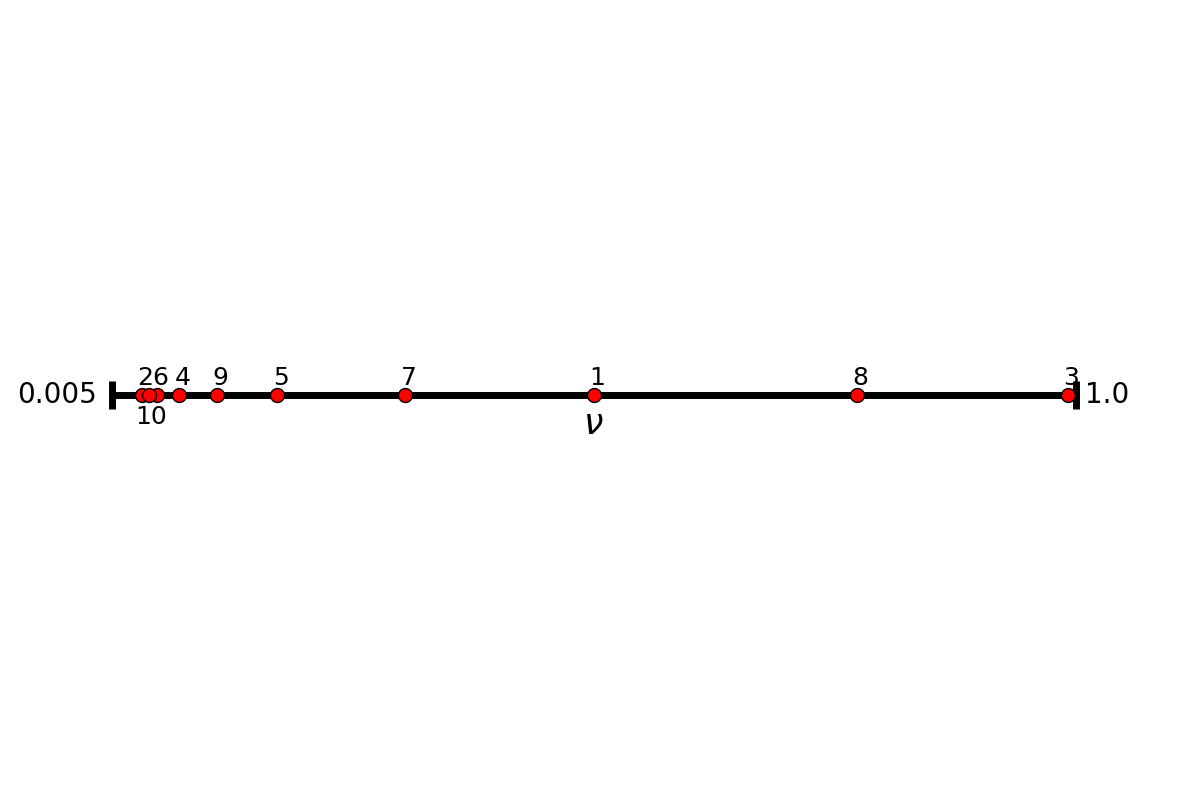

In [5]:
# plot5
neurons_sgpt = np.loadtxt(path+"sgpt_neurons.dat") # (13,3)

# plot6
neurons_gpt = np.loadtxt(path+"gpt_neurons.dat") # (13,3)

fig, ax = plt.subplots(figsize=(15,10))
xmin = 0.005; xmax = 1
y = 1; height = 0.15

ax.hlines(y, xmin, xmax, colors="k", lw=5)
ax.vlines(xmin, y - height/4, y + height/4, colors="k", lw=5)
ax.vlines(xmax, y - height/4, y + height/4, colors="k", lw=5)

xx = neurons_gpt
yy = [y]*len(neurons_gpt)

ax.plot(xx, yy, "ko", ms=10, mfc="r")

offsetX=mpl.transforms.ScaledTranslation(.1,  0, fig.dpi_scale_trans)
offsetY=mpl.transforms.ScaledTranslation( 0, .1, fig.dpi_scale_trans)

for i, param in enumerate(neurons_gpt):
        if i==9:
                ax.text(param-0.025, y, f"{i+1}", ha="left", va="top", transform=ax.transData+offsetX-offsetY, fontsize=18)
        else:
                ax.text(param-0.015, y+0.1, f"{i+1}", ha="left", va="top", transform=ax.transData+offsetX-offsetY, fontsize=18)

ax.text(-0.01, y, "0.005", horizontalalignment="right", 
        verticalalignment="center", fontsize=20)
ax.text(  1.01, y,   "1.0", horizontalalignment="left", 
        verticalalignment="center", fontsize=20)
ax.text((0.005+1.0)/2, y-0.1, r"$\nu$", fontsize=25, 
        horizontalalignment="center")
ax.set_xlim(-0.1,1.1)
ax.set_ylim(0,2)
ax.axis("off")
plt.show()

In [18]:
#plot 15
test_cases = np.loadtxt(path+"b_test.dat")
xt_test  = np.loadtxt(path+"xt_test.dat")
test_pinn_soln = np.loadtxt(path+"pinn_test_soln.dat") # (1600,200) 
test_gpt_soln  = np.loadtxt(path+"test_gpt_soln.dat") # (1600,200)
test_sgpt_soln = np.loadtxt(path+"test_bic_sgpt_soln.dat") # (1600,200)

shape= [100,100]
x = xt_test[:,0].reshape(shape).transpose(1,0)
t = xt_test[:,1].reshape(shape).transpose(1,0)

index = 18
print(fr"$\nu={round(test_cases[index],4)}$")
ex_gpt_soln = test_gpt_soln[:,index]
ex_sgpt_soln = test_sgpt_soln[:,index]
ex_pinn_soln = test_pinn_soln[:,index]

$\nu=0.8212$


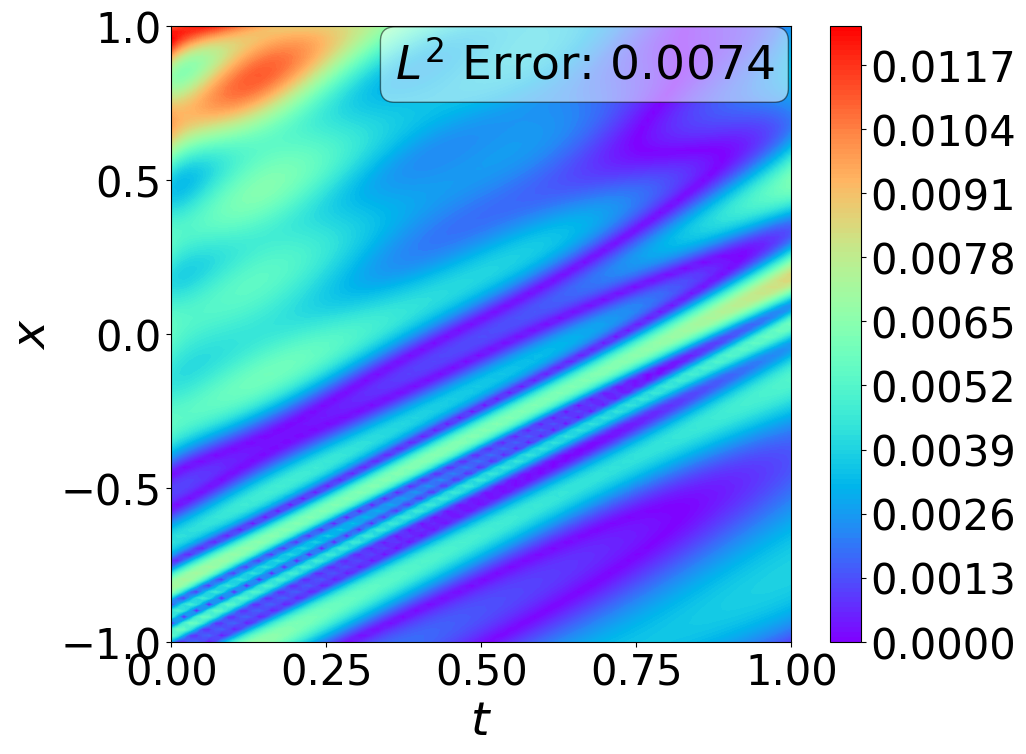

In [25]:
L2 = np.linalg.norm(ex_sgpt_soln - ex_pinn_soln) / np.linalg.norm(ex_pinn_soln)
fig, ax = plt.subplots(figsize=(10,8))
plot = ax.contourf(t, x, abs(ex_sgpt_soln-ex_pinn_soln).reshape(shape).transpose(1,0), 150, cmap="rainbow")
cbar = fig.colorbar(plot)
cbar.ax.tick_params(labelsize=30)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.36, 0.975, f"$L^2$ Error: {round(L2,4)}", transform=ax.transAxes, 
        fontsize=34, verticalalignment='top', bbox=props)
#ax.set_title(fr"Error SGPT-PINN: $\nu={round(test_cases[index],4)}$", fontsize=25)
ax.set_xlabel("$t$", fontsize=34)
ax.set_ylabel("$x$", fontsize=34)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.show()

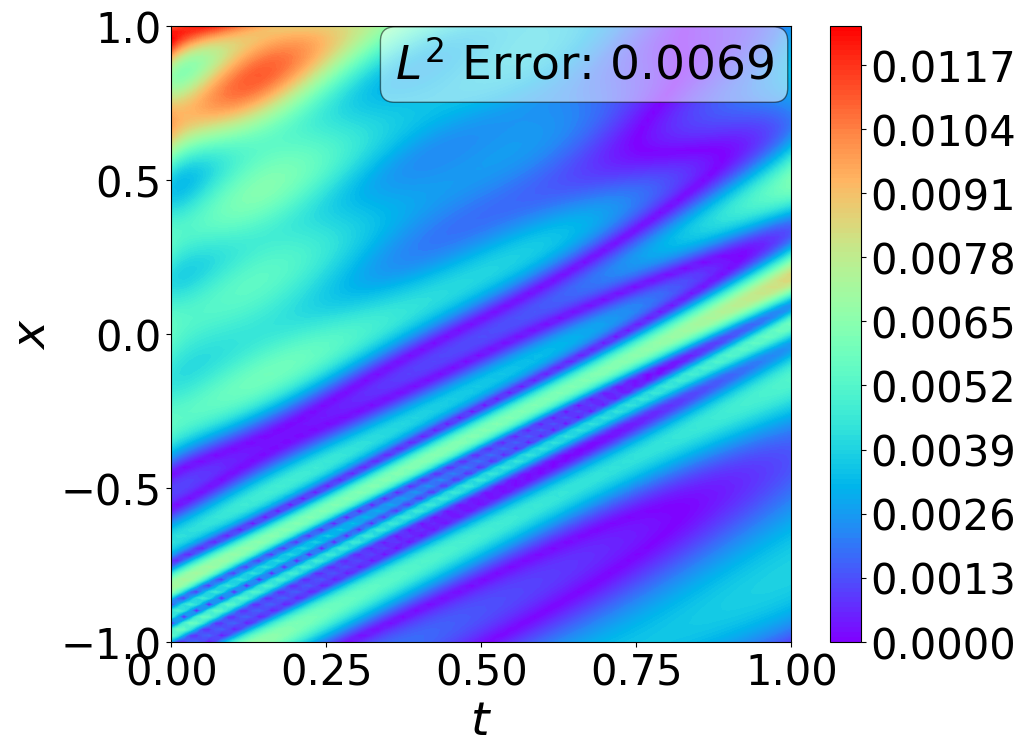

In [26]:
L2 = np.linalg.norm(ex_gpt_soln - ex_pinn_soln) / np.linalg.norm(ex_pinn_soln)
fig, ax = plt.subplots(figsize=(10,8))
plot = ax.contourf(t, x, abs(ex_sgpt_soln-ex_pinn_soln).reshape(shape).transpose(1,0), 150, cmap="rainbow")
cbar = fig.colorbar(plot)
cbar.ax.tick_params(labelsize=30)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.36, 0.975, f"$L^2$ Error: {round(L2,4)}", transform=ax.transAxes, 
        fontsize=34, verticalalignment='top', bbox=props)
#ax.set_title(fr"Error GPT-PINN: $\nu={round(test_cases[index],4)}$", fontsize=25)
ax.set_xlabel("$t$", fontsize=34)
ax.set_ylabel("$x$", fontsize=34)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.show()

In [13]:
index = 12
print(fr"$\nu={round(test_cases[index],4)}$")
ex_gpt_soln = test_gpt_soln[:,index]
ex_sgpt_soln = test_sgpt_soln[:,index]
ex_pinn_soln = test_pinn_soln[:,index]

$\nu=0.0672$


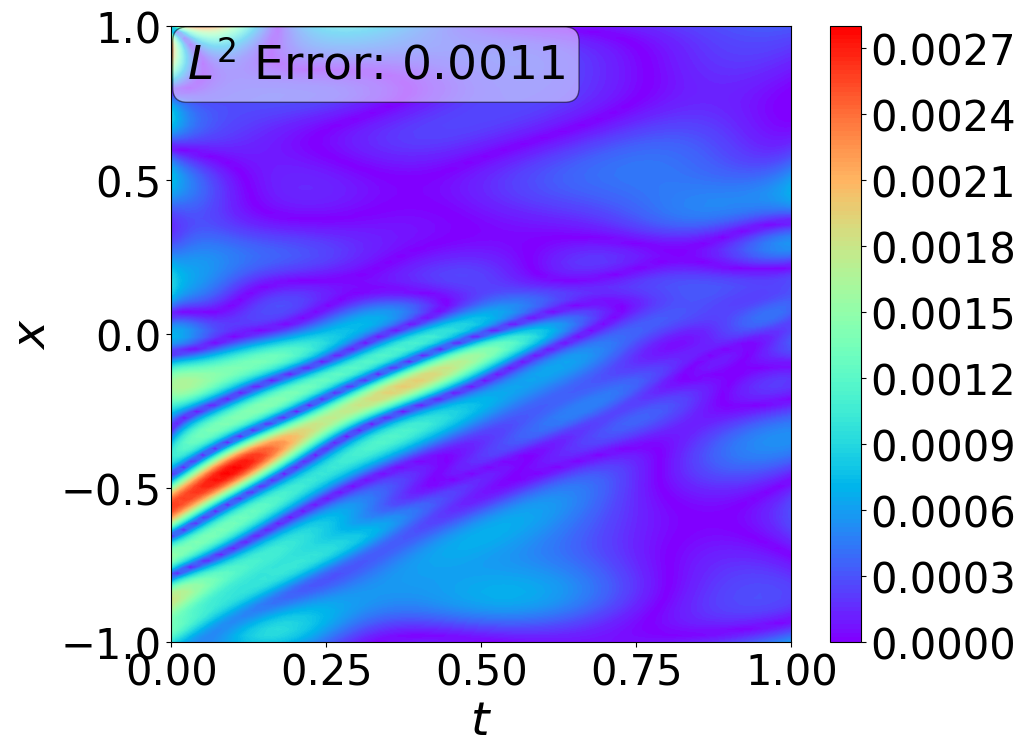

In [14]:
L2 = np.linalg.norm(ex_sgpt_soln - ex_pinn_soln) / np.linalg.norm(ex_pinn_soln)
fig, ax = plt.subplots(figsize=(10,8))
plot = ax.contourf(t, x, abs(ex_sgpt_soln-ex_pinn_soln).reshape(shape).transpose(1,0), 150, cmap="rainbow")
cbar = fig.colorbar(plot)
cbar.ax.tick_params(labelsize=30)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.025, 0.975, f"$L^2$ Error: {round(L2,4)}", transform=ax.transAxes, 
        fontsize=34, verticalalignment='top', bbox=props)
#ax.set_title(fr"Error SGPT-PINN: $\nu={round(test_cases[index],4)}$", fontsize=25)
ax.set_xlabel("$t$", fontsize=34)
ax.set_ylabel("$x$", fontsize=34)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.show()

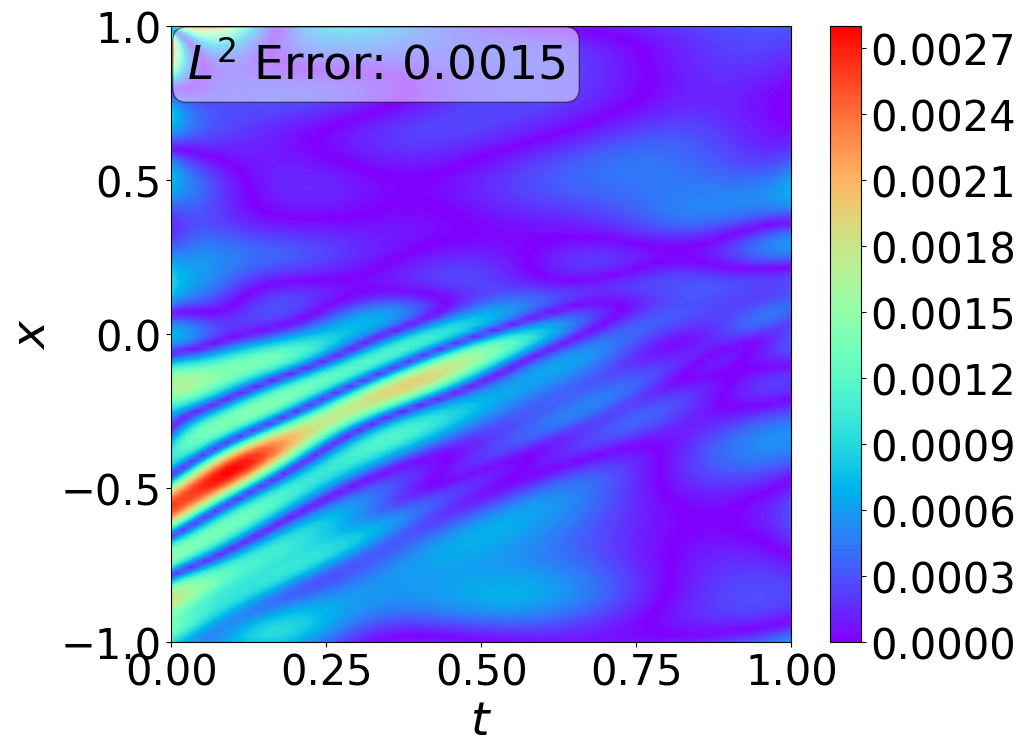

In [15]:
L2 = np.linalg.norm(ex_gpt_soln - ex_pinn_soln) / np.linalg.norm(ex_pinn_soln)
fig, ax = plt.subplots(figsize=(10,8))
plot = ax.contourf(t, x, abs(ex_sgpt_soln-ex_pinn_soln).reshape(shape).transpose(1,0), 150, cmap="rainbow")
cbar = fig.colorbar(plot)
cbar.ax.tick_params(labelsize=30)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.025, 0.975, f"$L^2$ Error: {round(L2,4)}", transform=ax.transAxes, 
        fontsize=34, verticalalignment='top', bbox=props)
#ax.set_title(fr"Error GPT-PINN: $\nu={round(test_cases[index],4)}$", fontsize=25)
ax.set_xlabel("$t$", fontsize=34)
ax.set_ylabel("$x$", fontsize=34)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.show()

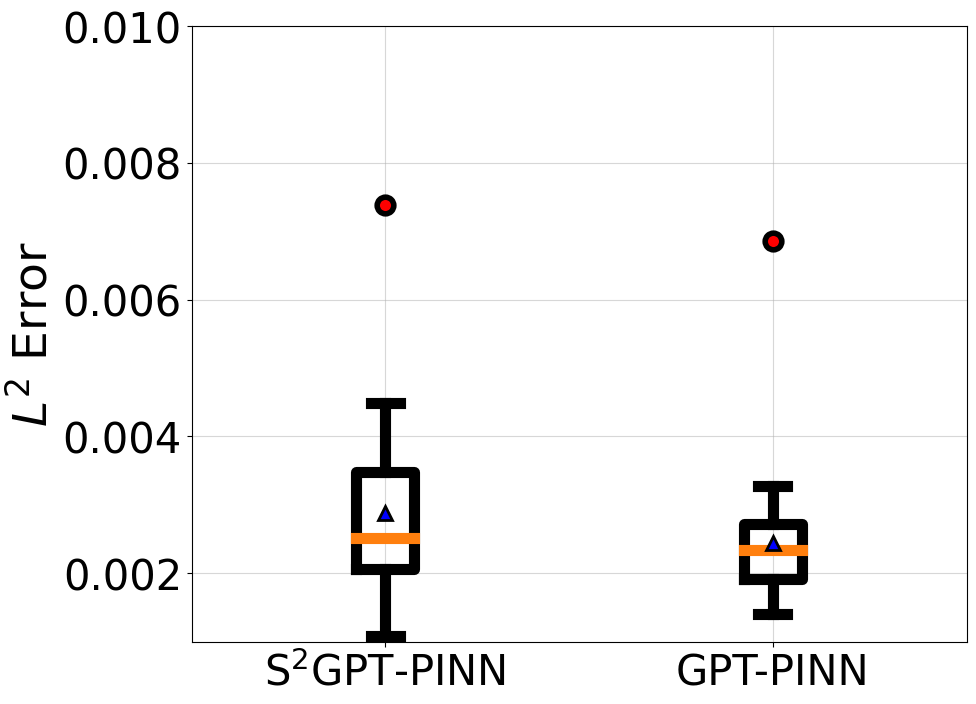

In [27]:
L2_sgpt = np.array([np.linalg.norm(test_sgpt_soln[:,i] - test_pinn_soln[:,i]) / np.linalg.norm(test_pinn_soln[:,i]) for i in range(test_pinn_soln.shape[1])])
L2_gpt  = np.array([np.linalg.norm( test_gpt_soln[:,i] - test_pinn_soln[:,i]) / np.linalg.norm(test_pinn_soln[:,i]) for i in range(test_pinn_soln.shape[1])])

errors = np.hstack((L2_sgpt[:,None], L2_gpt[:,None]))

fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot(errors, showmeans=True, boxprops=dict(linewidth=8), 
           whiskerprops=dict(linewidth=8), capprops=dict(linewidth=8),
           medianprops=dict(linewidth=8), meanprops=dict(marker='^',
           markersize=10, markerfacecolor='blue', markeredgecolor='black',
           markeredgewidth=2),
           flierprops=dict(marker='o',  markersize=12, linestyle='none', 
                           markerfacecolor='r', markeredgewidth=4))
ax.grid(alpha=0.5)
ax.set_ylabel("$L^2$ Error", fontsize=34)
ax.set_xticks([1,2], ["S$^2$GPT-PINN", "GPT-PINN"])
ax.set_ylim(1e-3,1e-2)
ax.tick_params(axis='both', which='major', labelsize=30)
#plt.yscale('log')
plt.show()

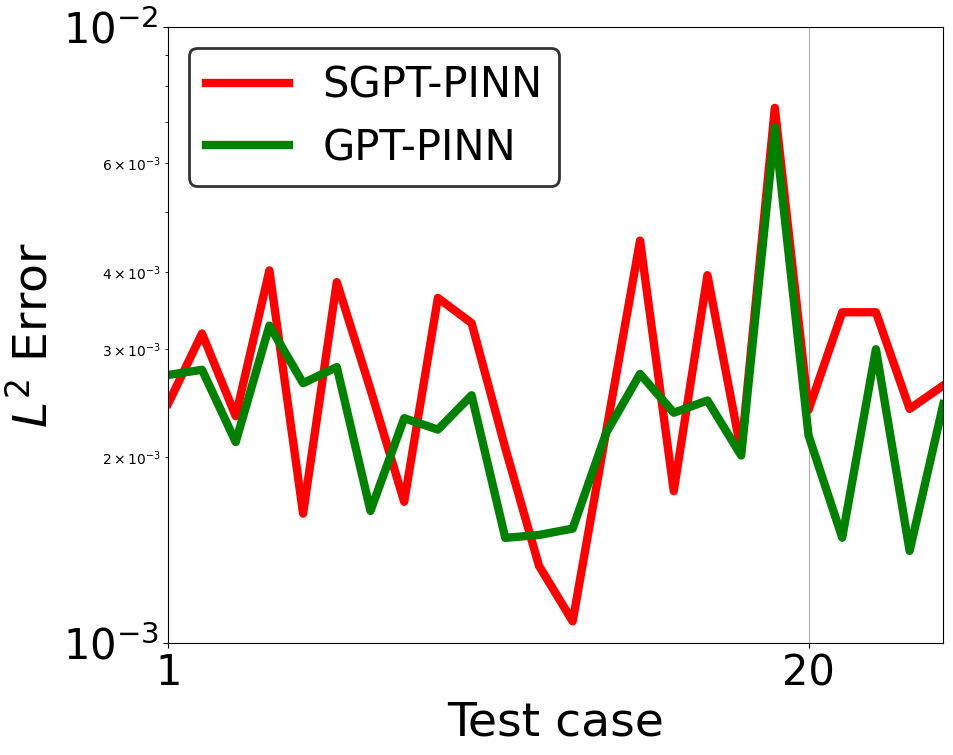

In [28]:
#plot 16
fig, ax = plt.subplots(figsize=(10,8))
x_plt16 = range(1,test_pinn_soln.shape[1]+1) 
x_ticks = list(range(0,test_pinn_soln.shape[1]+1,20))
x_ticks[0] = 1
ax.plot(x_plt16, L2_sgpt, color="red",   label="SGPT-PINN", lw=6)
ax.plot(x_plt16, L2_gpt,  color="green", label="GPT-PINN",  lw=6)
ax.set_xticks(ticks=x_ticks)
ax.set_xlim(min(x_plt16),max(x_plt16))
ax.set_ylim(1e-3,1e-2)
ax.set_xlabel("Test case", fontsize=34)
ax.set_ylabel("$L^2$ Error", fontsize=34)
legend = ax.legend(frameon=True, fontsize=30)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.tick_params(axis='both', which='major', labelsize=30)
ax.grid()
plt.yscale('log')
plt.show()

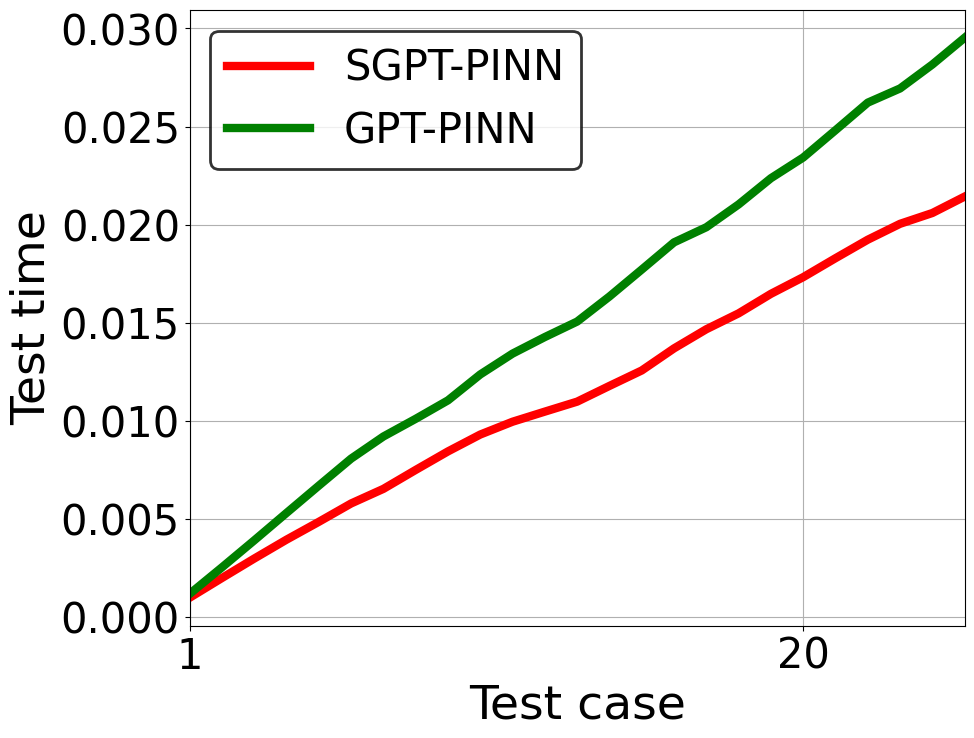

In [31]:
#plot 17
test_gpt_time  = np.loadtxt(path+"gpt_test_time.dat")- np.loadtxt(path+"gpt_total_time.dat")# (1600,200)
test_sgpt_time = np.loadtxt(path+"sgpt_test_time.dat")- np.loadtxt(path+"sgpt_total_time.dat") # (1600,200)
fig, ax = plt.subplots(figsize=(10,8))
x_plt16 = range(1,test_pinn_soln.shape[1]+2) 
x_ticks = list(range(0,test_pinn_soln.shape[1]+2,20))
x_ticks[0] = 1
ax.plot(x_plt16, test_sgpt_time, color="red",   label="SGPT-PINN", lw=6)
ax.plot(x_plt16, test_gpt_time,  color="green", label="GPT-PINN",  lw=6)
ax.set_xticks(ticks=x_ticks)
ax.set_xlim(min(x_plt16),max(x_plt16))
ax.set_xlabel("Test case", fontsize=34)
ax.set_ylabel("Test time", fontsize=34)
legend = ax.legend(frameon=True, fontsize=30)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.tick_params(axis='both', which='major', labelsize=30)
ax.grid()
#plt.yscale('log')
plt.show()

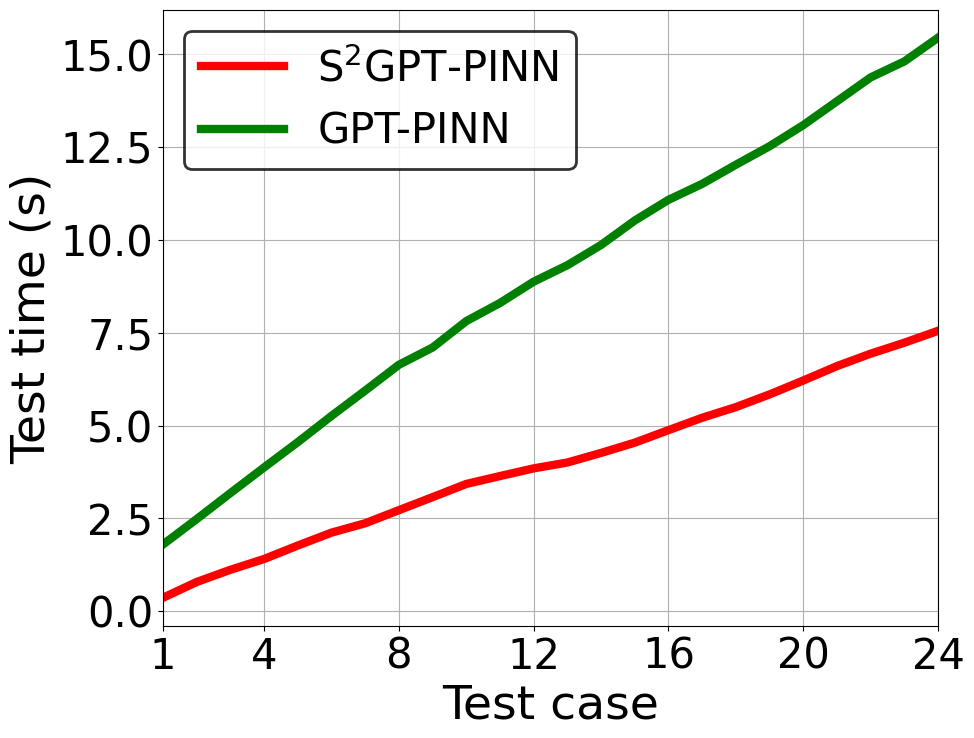

In [36]:
#plot 17
test_gpt_time  = np.loadtxt(path+"test_gpt_time.dat")# (1600,200)
test_sgpt_time = np.loadtxt(path+"test_bic_sgpt_time.dat")# (1600,200)
fig, ax = plt.subplots(figsize=(10,8))
x_plt16 = range(1,test_pinn_soln.shape[1]+1) 
x_ticks = list(range(0,test_pinn_soln.shape[1]+1,4))
x_ticks[0] = 1
ax.plot(x_plt16, test_sgpt_time*3600, color="red",   label="S$^2$GPT-PINN", lw=6)
ax.plot(x_plt16, test_gpt_time*3600,  color="green", label="GPT-PINN",  lw=6)
ax.set_xticks(ticks=x_ticks)
ax.set_xlim(min(x_plt16),max(x_plt16))
ax.set_xlabel("Test case", fontsize=34)
ax.set_ylabel("Test time (s)", fontsize=34)
legend = ax.legend(frameon=True, fontsize=30)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.tick_params(axis='both', which='major', labelsize=30)
ax.grid()
#plt.yscale('log')
plt.show()

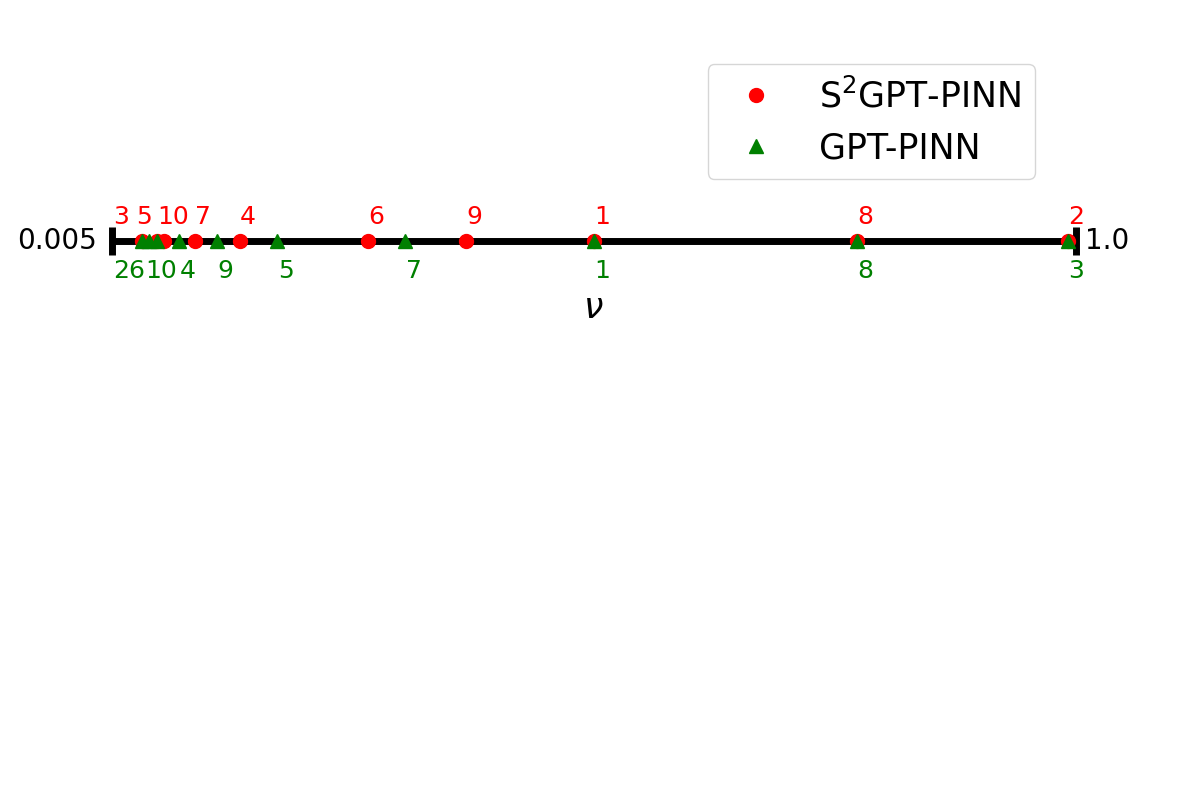

In [5]:
neurons_sgpt = np.loadtxt(path + "sgpt_neurons.dat")  # (13,)
neurons_gpt = np.loadtxt(path + "gpt_neurons.dat")   # (13,)

# 绘图
fig, ax = plt.subplots(figsize=(15, 10))
xmin = 0.005
xmax = 1
y = 1.4
height = 0.15

# 绘制水平线和垂直线
ax.hlines(y, xmin, xmax, colors="k", lw=5)
ax.vlines(xmin, y - height / 4, y + height / 4, colors="k", lw=5)
ax.vlines(xmax, y - height / 4, y + height / 4, colors="k", lw=5)

# 绘制 SGPT 数据点（红色圆形）
xx_sgpt = neurons_sgpt
yy_sgpt = [y] * len(neurons_sgpt)
ax.plot(xx_sgpt, yy_sgpt, "ro", ms=10, label="S$^2$GPT-PINN")

# 绘制 GPT 数据点（蓝色三角形）
xx_gpt = neurons_gpt
yy_gpt = [y] * len(neurons_gpt)
ax.plot(xx_gpt, yy_gpt, "g^", ms=10, label="GPT-PINN")

# 添加文本偏移
offsetX = mpl.transforms.ScaledTranslation(0.1, 0, fig.dpi_scale_trans)
offsetY = mpl.transforms.ScaledTranslation(0, 0.1, fig.dpi_scale_trans)

# 为 SGPT 数据添加编号
for i, param in enumerate(neurons_sgpt):
    if i == 2 or i==4:
        ax.text(param - 0.04, y + 0.12, f"{i + 1}", ha="left", va="top", 
                transform=ax.transData + offsetX - offsetY, fontsize=18, color="red")
    else:
        ax.text(param - 0.01, y + 0.12, f"{i + 1}", ha="left", va="top", 
                transform=ax.transData + offsetX - offsetY, fontsize=18, color="red")

# 为 GPT 数据添加编号
for i, param in enumerate(neurons_gpt):
    if i == 1 or i==5:
        ax.text(param - 0.04, y-0.02, f"{i + 1}", ha="left", va="top", 
                transform=ax.transData + offsetX - offsetY, fontsize=18, color="green")
    elif i ==9:
        ax.text(param - 0.015, y-0.02, f"{i + 1}", ha="left", va="top", 
                transform=ax.transData + offsetX - offsetY, fontsize=18, color="green")
    else:
        ax.text(param - 0.01, y-0.02, f"{i + 1}", ha="left", va="top", 
            transform=ax.transData + offsetX - offsetY, fontsize=18, color="green")

# 添加标签和刻度说明
ax.text(-0.01, y, "0.005", horizontalalignment="right", verticalalignment="center", fontsize=20)
ax.text(1.01, y, "1.0", horizontalalignment="left", verticalalignment="center", fontsize=20)
ax.text((0.005 + 1.0) / 2, y - 0.2, r"$\nu$", fontsize=25, horizontalalignment="center")

# 设置坐标范围和隐藏坐标轴
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(0, 2)
ax.axis("off")

# 添加图例
ax.legend(fontsize=25, loc=(0.6,0.78))

# 显示图形
plt.show()


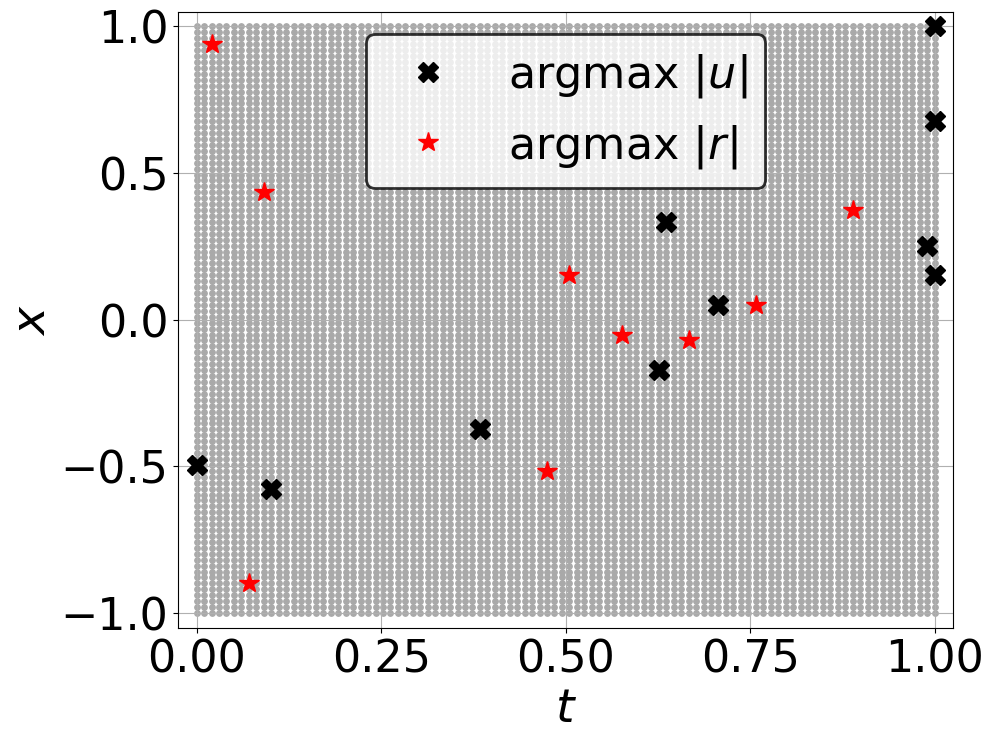

In [11]:
# Sparse training grid (plot3)
xt_resid   = np.loadtxt(path+"xt_resid.dat") # (10000,2)
X_umax_idx = np.loadtxt(path+"X_umax_idx.dat").astype(np.int64) # (13,)
X_rmax_idx = np.loadtxt(path+"X_rmax_idx.dat").astype(np.int64) # (12,)

x_u = xt_resid[X_umax_idx,0]
t_u = xt_resid[X_umax_idx,1]

x_r = xt_resid[X_rmax_idx,0]
t_r = xt_resid[X_rmax_idx,1]

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(xt_resid[:, 1], xt_resid[:, 0], color="darkgray", s=15)

ax.plot(t_u, x_u, "X", color="black", label="argmax $|u|$", markersize=15)
ax.plot(t_r, x_r, "*", color="red",   label="argmax $|r|$", markersize=15)
ax.set_xlim(0-0.025,1+0.025)
ax.set_xlabel("$t$", fontsize=34)
ax.set_ylim(-1-0.05,1+0.05)
ax.set_ylabel("$x$", fontsize=34)
legend = ax.legend(frameon=True, fontsize=32,loc=9)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.tick_params(axis='both', which='major', labelsize=32)
ax.grid()
plt.show()